<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 6
## Ejercicio integrador de exámen
### Jorge Andres Niño


## Consigna

Resolver los puntos mostrados en el siguiente documento:

In [1]:
from IPython.display import IFrame, display
IFrame("./Ejercicio integrador teoria moderna_TS6.pdf", width=1000, height=1000)

A continuación se presenta la solución obtenida:

In [2]:
from IPython.display import IFrame, display
IFrame("./TS6_res.pdf", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica

In [1]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_bicuad_omegayq, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt


<IPython.core.display.Math object>

<IPython.core.display.Math object>

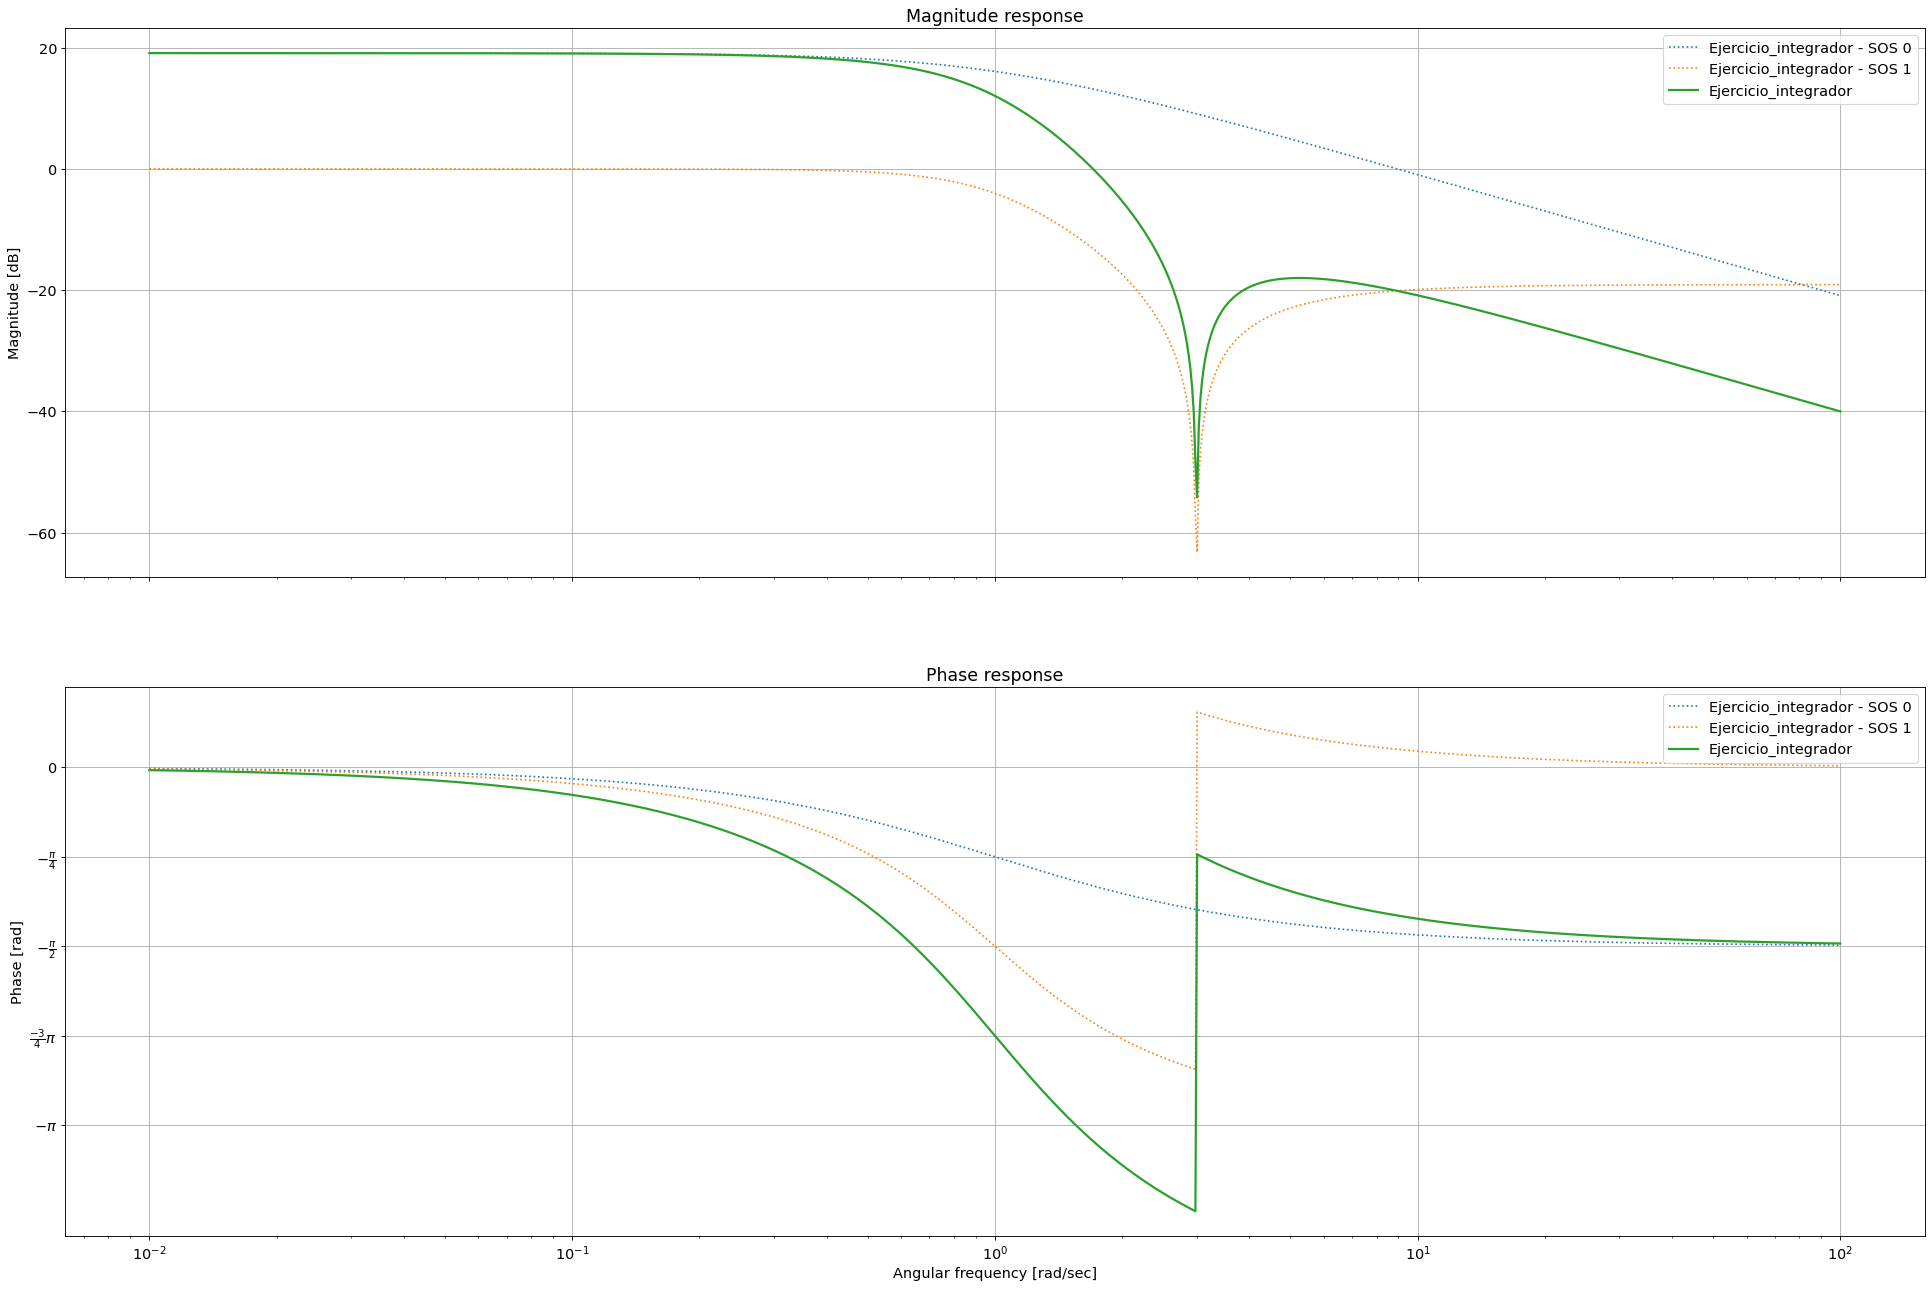

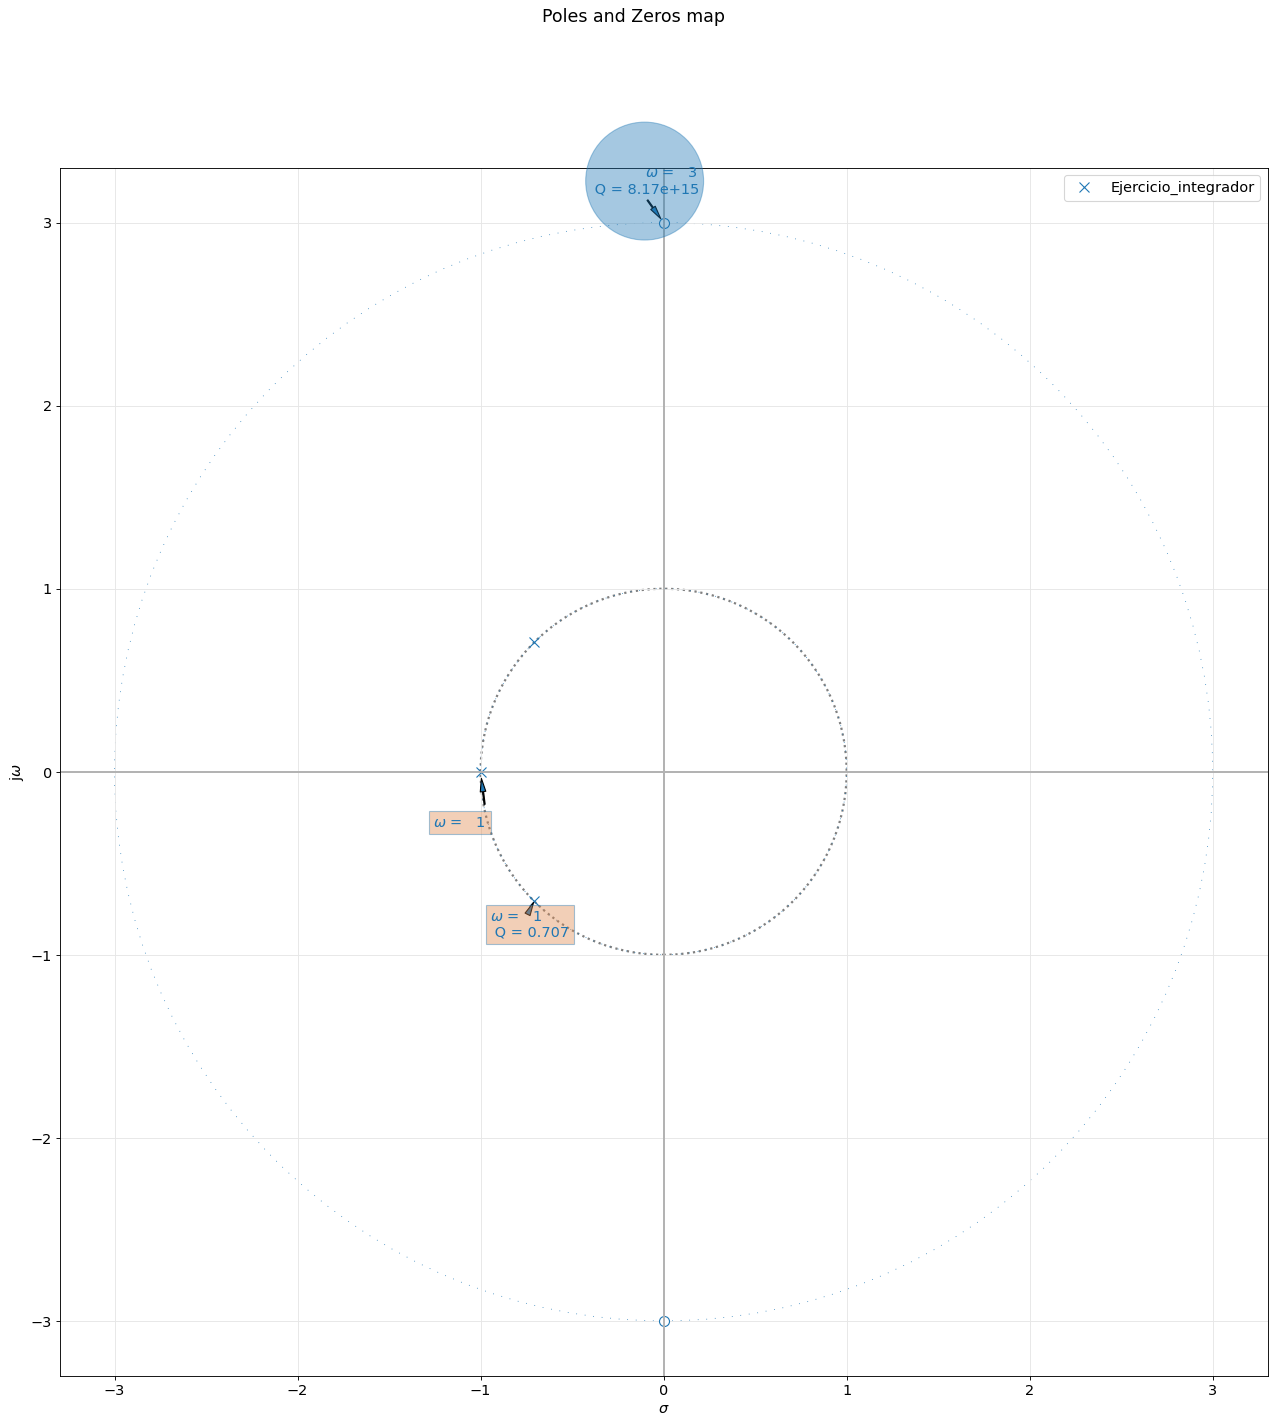

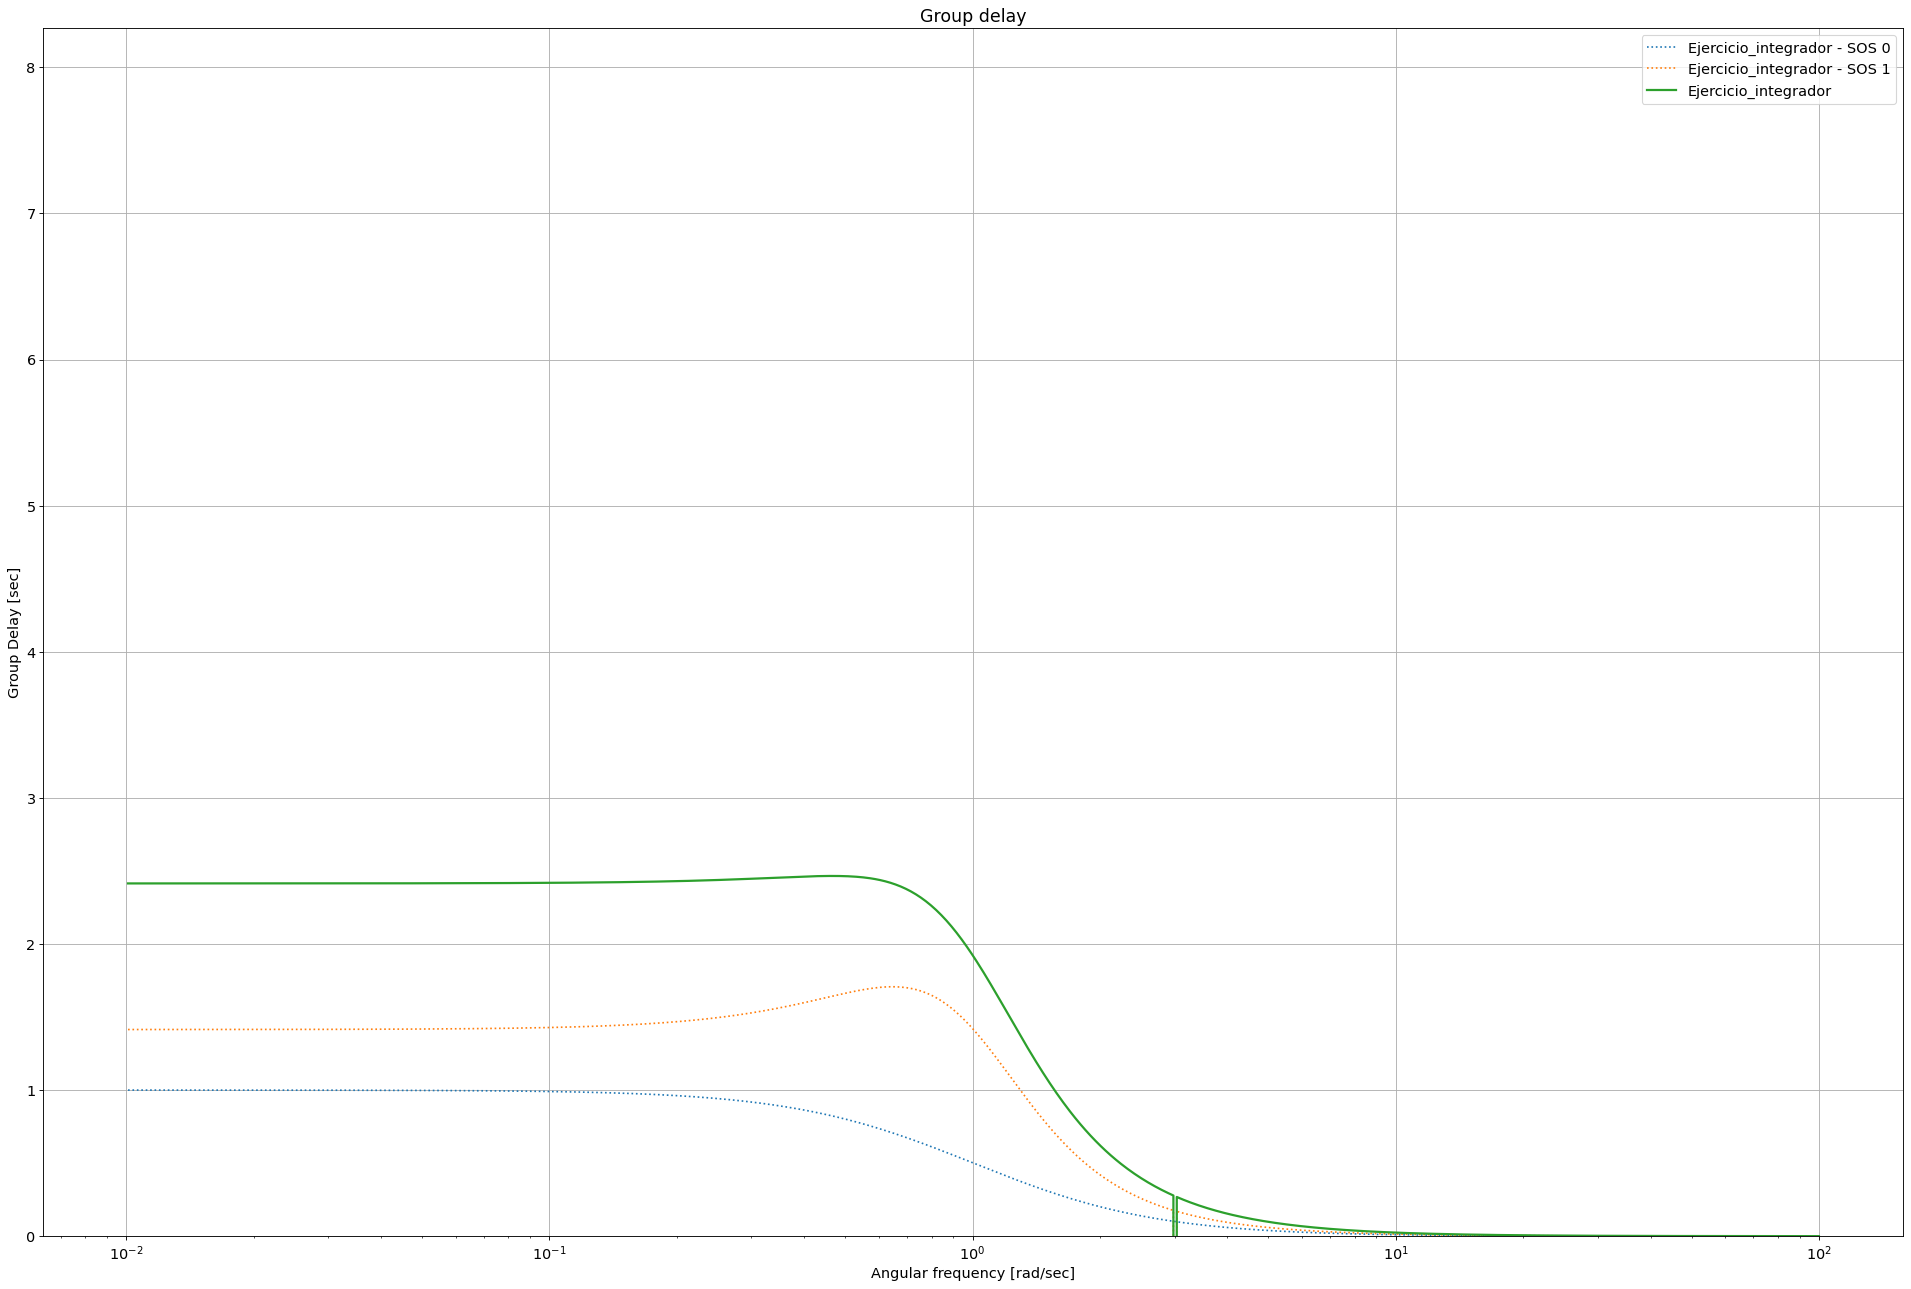

In [19]:
#%% Funcion trasnferencia prototipo:
w0 = 1
wn =3
num1= np.array([w0**2,0,wn**2])
den1 = np.array([w0**3,2.4142*w0**2, 2.4142*w0, 1])
H1 = Funcion.TransferFunction( num1, den1 )
pretty_print_lti(num1, den1)
fig_sz_x = 30
fig_sz_y = 20
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

# particiono en SOS's para la implementación
sos_hp = tf2sos_analog(num1, den1)
pretty_print_SOS(sos_hp)
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
analyze_sys(sos_hp, 'Ejercicio_integrador')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

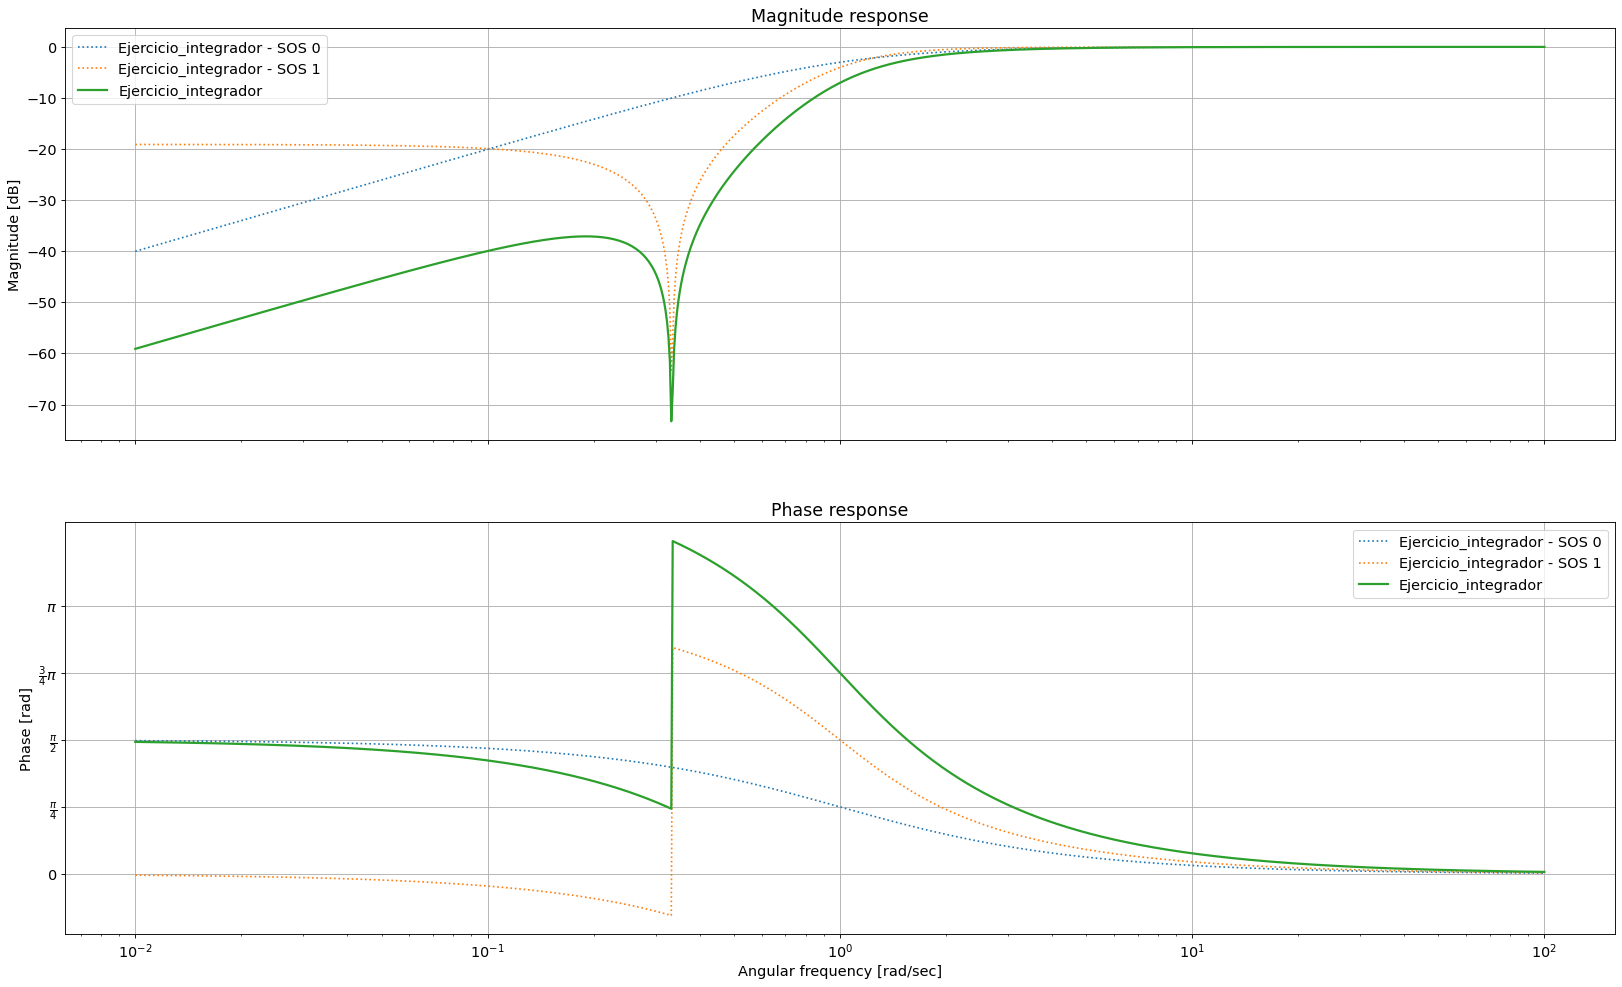

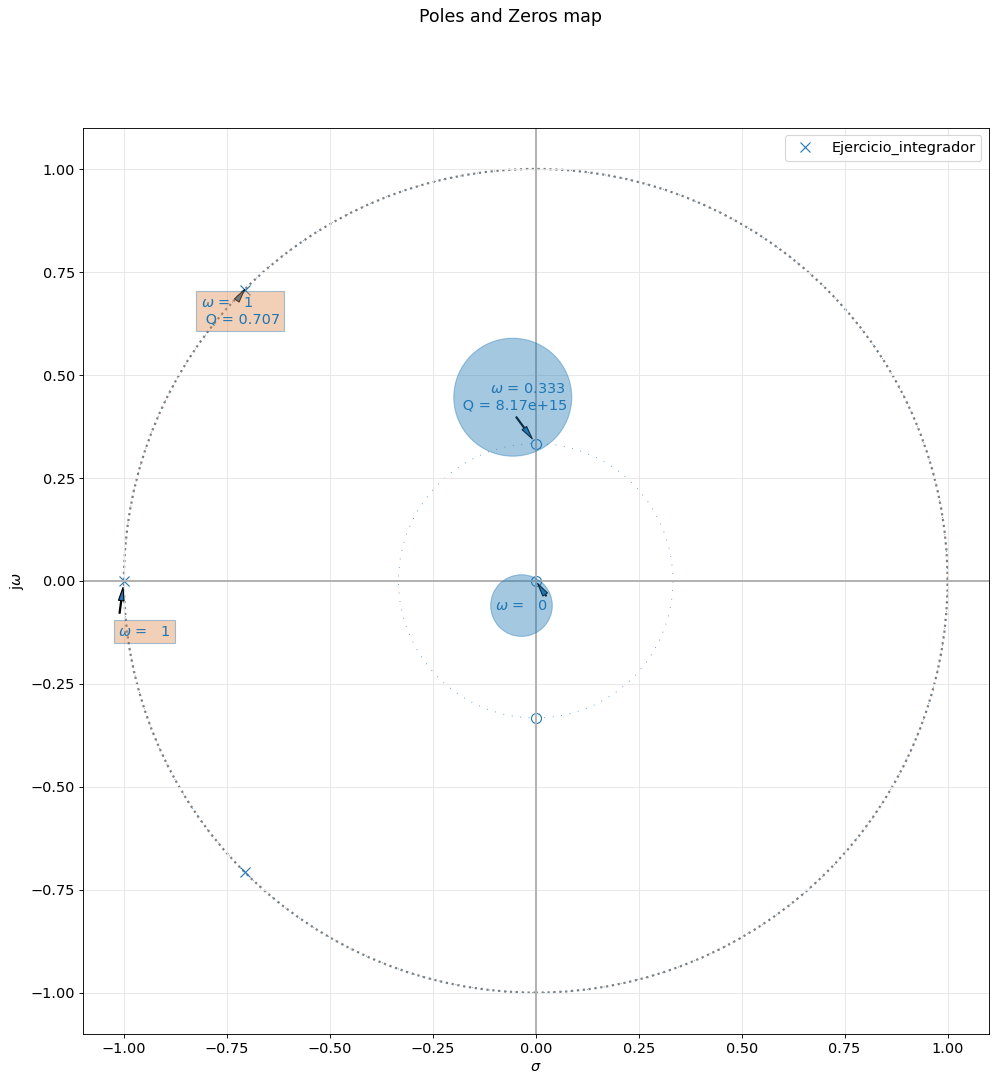

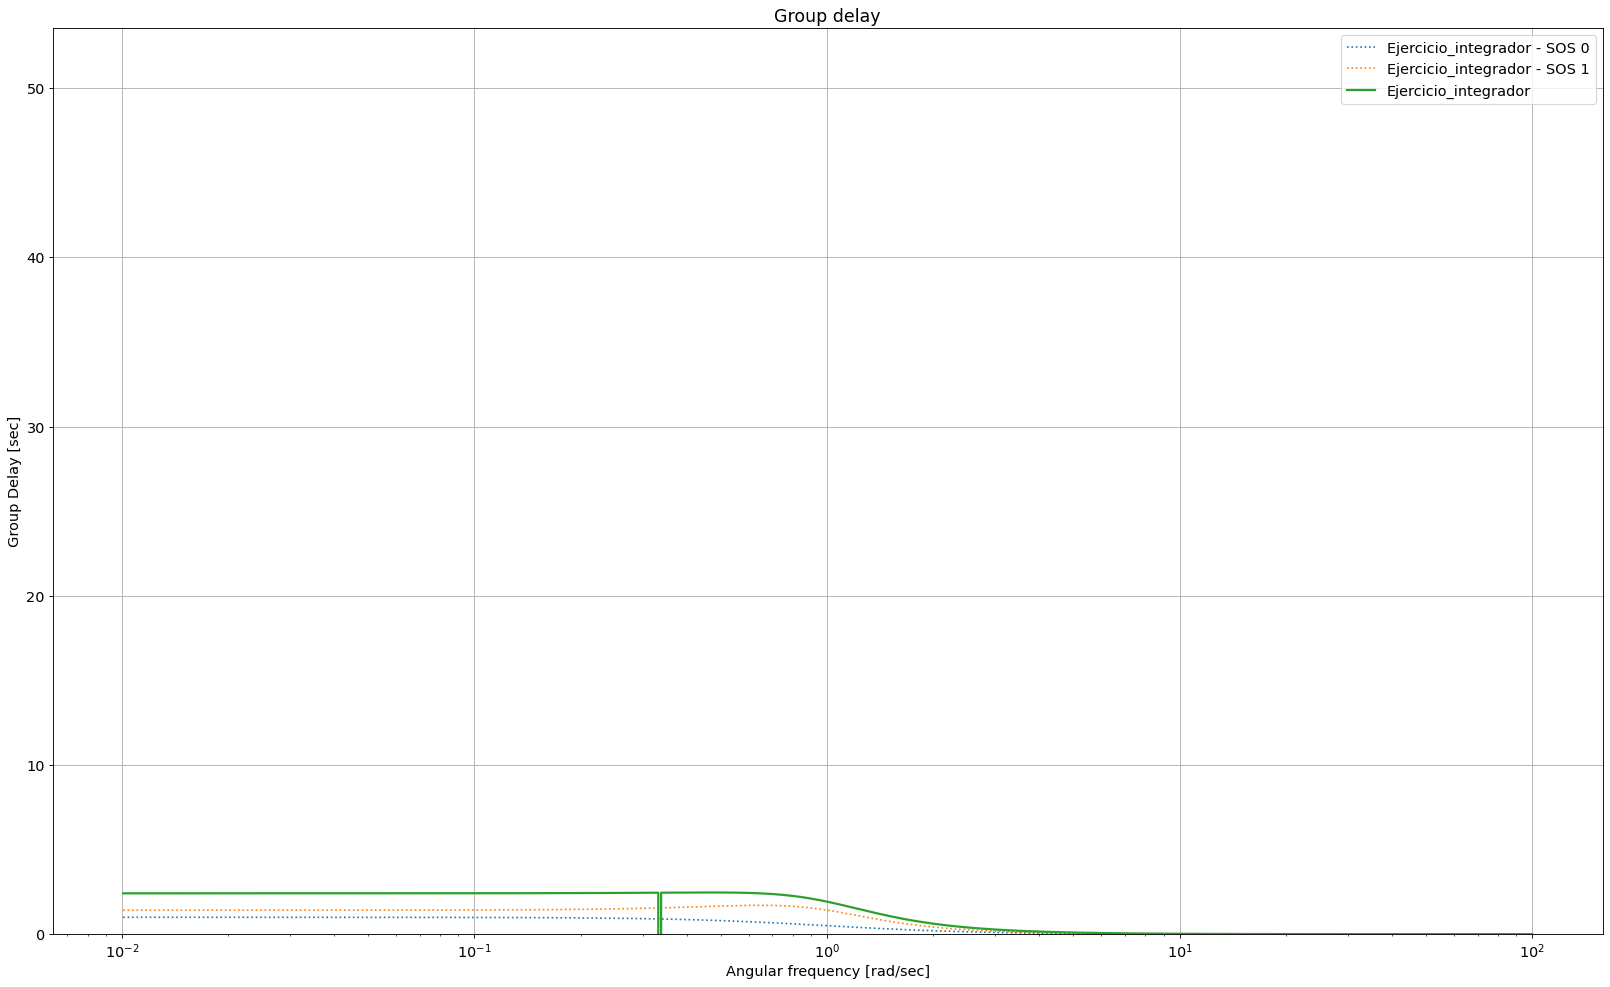

In [23]:
#%% Funcion transferencia pasa-altos:
w0 = 1
wn = 3
wn2= 1/9
num1= np.array([w0**3,0,w0*wn2,0])
den1 = np.array([w0**3,2.4142*w0**2, 2.4142*w0, 1])
H1 = Funcion.TransferFunction( num1, den1 )
pretty_print_lti(num1, den1)
fig_sz_x = 25
fig_sz_y = 15
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

# particiono en SOS's para la implementación
sos_hp = tf2sos_analog(num1, den1)
pretty_print_SOS(sos_hp)
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
analyze_sys(sos_hp, 'Ejercicio_integrador')

Podemos ahora implementarlo empleando el método mencionado en el apartado 5.2 del Schauman:

![*Figura 7*](LTCIR.png)

![*Figura 7*](LTSIM.png)

Podemos observar que si bien obtenemos una respuesta adecuada, con atenuación de $20db/decada$ para las frecuencias inferiores a la frecuencia del cero de transmisión, y un cero de transmisión en $f_N=f_0/3$ aunque como observamos en la simulación numerica, tenemos afectada la atenuación en banda de paso, debido al efecto de la mayor atenuación que introduce la función bicuadratica. Modificando la frecuencia de butter de la etapa 2 podemos obtener la respuesta mas ajustada por ejemplo con $R2=2$, bajamos de $8db$ a $6db$:

![*Figura 7*](SIM_PAR.png)

Ahora introduciendo las frecuencias de la plantilla original, obtenemos la respuesta esperada:

![*Figura 7*](SIM_SC_1.png)

Podemos observar tanto la atenuación requerida, como el cero de transmisión, así como una respuesta en la banda de paso aceptable para la interpretación de la figura.

## Implementación mediante circuito Bicuad

A continuación podemos emplear la estructura bicuad mencionada en el planteo del problema, para sintetizar una de las funciones SOS de tal manera de obtener la bicuadratica y luego mediante un simple RC pasa altos obtener la misma respuesta que el circuito anterior.

In [1]:
from IPython.display import IFrame, display
IFrame("./TS6_res_gic.pdf", width=1000, height=1000)

![*Figura 8*](LTCIRGIC.png)

![*Figura 9*](LTSIMGIC.png)

Como podemos observar, el ajuste permitio obtener mejores resultados, obteniendo una función con banda de paso de $3 db$ y todas las caracteristicas pedidas en la plantilla

# Conclusiones:
 

* Mediante el uso de las funciones bicuadraticas, pudimos ajustar una respuesta a una plantilla tipo pasa-altos notch, con una respuesta bastante ajustada a la pedida. Usando el levantamiento parcial de impedancias, se pudo implementar correctamente la bicuadratica, y ajustar el cero de transmisión adecuadamente. Sin embargo se observo que el ajuste necesariamente introduce una atenuación no deseada, y que para obtener una respuesta de menor atenuación es necesario re-calcular los valores de $Q$ y $\omega_o$ de ambas funciones.
* Mediante el uso de un GIC bicuadratico para pasa-altos, ajustado para obtener la respuesta esperada, se obtuvo una respuesta mejor, sin embargo los parametros son interdependientes y no se obtiene la ortogonalidad que se podría obtener con el GIC bicudratico completo. 